In [3]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import re
!pip install wordcloud
from wordcloud import WordCloud

In [31]:
df=pd.read_csv("alldata.csv")
df.head()

position  ...            location
0                               Development Director  ...  Atlanta, GA 30301 
1  An Ostentatiously-Excitable Principal Research...  ...         Atlanta, GA
2                                     Data Scientist  ...         Atlanta, GA
3                                       Data Analyst  ...  Atlanta, GA 30303 
4  Assistant Professor -TT - Signal Processing & ...  ...         Atlanta, GA

[5 rows x 5 columns]

In [32]:
df.head()


position  ...            location
0                               Development Director  ...  Atlanta, GA 30301 
1  An Ostentatiously-Excitable Principal Research...  ...         Atlanta, GA
2                                     Data Scientist  ...         Atlanta, GA
3                                       Data Analyst  ...  Atlanta, GA 30303 
4  Assistant Professor -TT - Signal Processing & ...  ...         Atlanta, GA

[5 rows x 5 columns]

In [33]:
df[df["reviews"].isnull()].head()

position  ...            location
0                                Development Director  ...  Atlanta, GA 30301 
1   An Ostentatiously-Excitable Principal Research...  ...         Atlanta, GA
2                                      Data Scientist  ...         Atlanta, GA
18                                     Data Scientist  ...         Atlanta, GA
19                                     Data Scientist  ...         Atlanta, GA

[5 rows x 5 columns]

In [34]:
print(df.company.isnull().value_counts())
print(df.reviews.isnull().value_counts())
print(df.location.isnull().value_counts())
print(df.reviews.isnull().value_counts())

False    6953
True       11
Name: company, dtype: int64
False    5326
True     1638
Name: reviews, dtype: int64
False    6953
True       11
Name: location, dtype: int64
False    5326
True     1638
Name: reviews, dtype: int64


### Data Cleaning 

In [37]:
df["reviews"]=df["reviews"].fillna(0)
df=df.dropna(subset=["position",'company','location',"description"])
df["city"]=df.location.str.split(',',expand=True).iloc[:,0]
df["state"]=df.location.str.split(' ',expand=True).iloc[:,1]
df.tail()



position  ... state
6959  Data Developer / Machine Learning Analyst  ...    CA
6960                                Scientist I  ...    CA
6961                           Intern Scientist  ...    CA
6962            Senior Data & Applied Scientist  ...    CA
6963    Principal Data Scientist, Deep Learning  ...    CA

[5 rows x 7 columns]

In [40]:
df["city"]=df.location.str.split(',',expand=True).iloc[:,0]
df.head()
df[df.company.str.contains("Google")]

position  ... state
313   Data and Machine Learning Technical Trainer, G...  ...    TX
505                      Developer Advocate, Serverless  ...    CO
530                      Student Research Collaboration  ...    CO
536   Quantitative Business Analyst, Google Technica...  ...    CO
538   Experiments and Modelling Analyst, Google Tech...  ...    CO
...                                                 ...  ...   ...
6925  Head of Data Science, Google Cloud Revenue Acc...  ...    CA
6934  Data Scientist, Cloud Revenue Acceleration, Go...  ...    CA
6941  Data Scientist, Engineering Support Analytics,...  ...    CA
6945      Machine Learning Specialist, Trust and Safety  ...    CA
6954            Global Mobility Specialist, Immigration  ...    CA

[134 rows x 7 columns]

In [8]:
df["state"]=df.location.str.split(' ',expand=True).iloc[:,1]
df.head()

position  ... state
0                               Development Director  ...    GA
1  An Ostentatiously-Excitable Principal Research...  ...    GA
2                                     Data Scientist  ...    GA
3                                       Data Analyst  ...    GA
4  Assistant Professor -TT - Signal Processing & ...  ...    GA

[5 rows x 7 columns]

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text major ticklabel objects>)

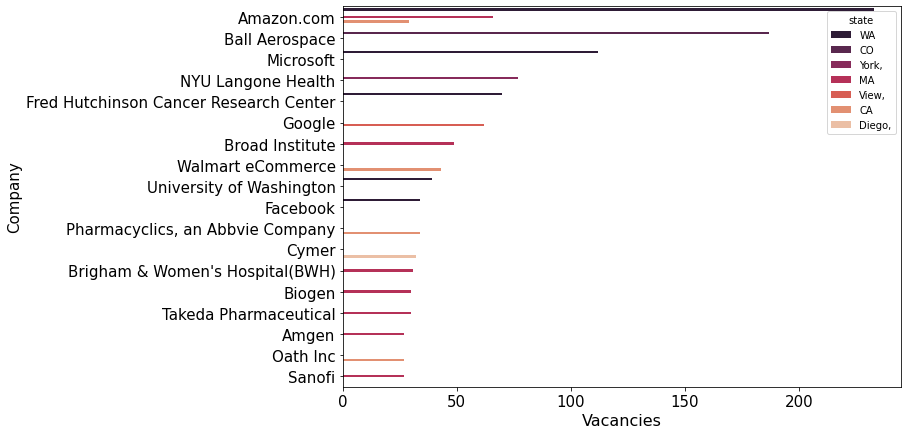

In [41]:
df1=df.groupby(by=["company","state"]).size().reset_index(name="Positions").sort_values(by="Positions",ascending=False)

df1.head()
plt.figure(figsize=(10,7))
sb.barplot(y="company",x="Positions",hue="state",data=df1.head(20
                                                               ),palette="rocket",errwidth=30,ci=1000)
plt.yticks(size=15)
plt.ylabel("Company",size=15)
plt.xlabel("Vacancies",size=16)
plt.xticks(size=15)


company                                           position   reviews
6323  Walmart                   Senior Data Scientist (GEC11902)  148114.0
6325  Walmart            Staff Software Engineer, Front End Lead  148114.0
6322  Walmart                   Information Security Risk Expert  148114.0
6321  Walmart                                 Data Scientist-ISD  148085.0
6324  Walmart                               Staff Data Scientist  148051.0
...       ...                                                ...       ...
3728   Lab126  Senior Software Engineer - AMAZON ALEXA MACHIN...       0.0
3729   Lab126  Senior/Lead Software Developer - AMAZON ALEXA ...       0.0
3730   Lab126                                 Software Developer       0.0
3731   Lab126                      Software Development Engineer       0.0
6659       쿠팡  Senior Software Engineer (Search Relevance/Infra)       0.0

[6660 rows x 3 columns]

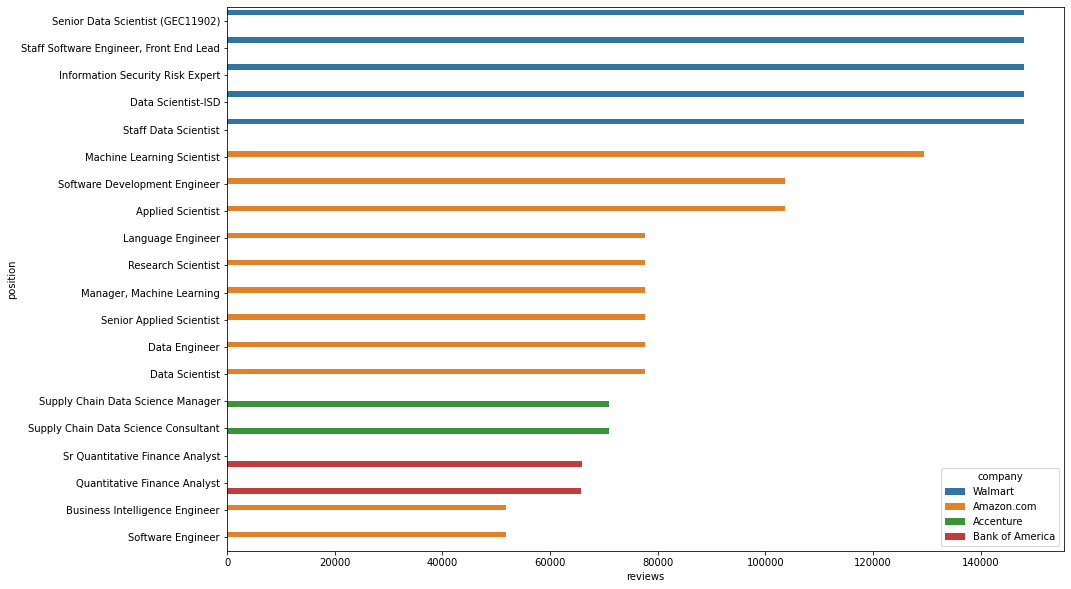

In [15]:
df0=df.groupby(by=["company","position"])["reviews"].sum().reset_index().sort_values(by="reviews",ascending=False)
plt.figure(figsize=(15,10))
sb.barplot(y="position",x="reviews",data=df0.head(20),hue="company")
df0

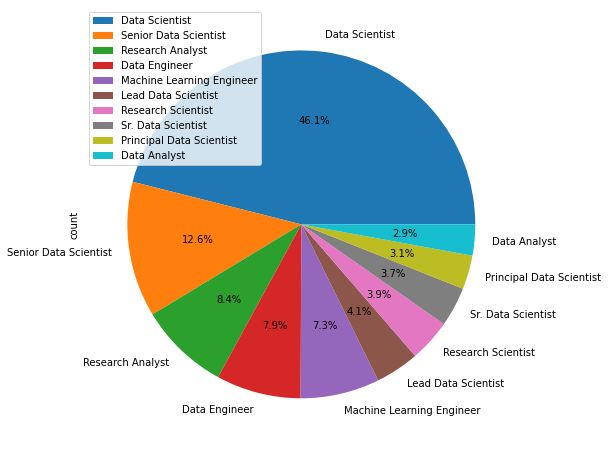

In [58]:
top=pd.DataFrame(df.position.value_counts()[:10])
top["Position"]=top.index
top=top.rename(columns={'position':'count'})
top.plot.pie(y="count",figsize=(35,8),subplots=True,autopct='%1.1f%%',)
plt.legend(loc="upper left")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

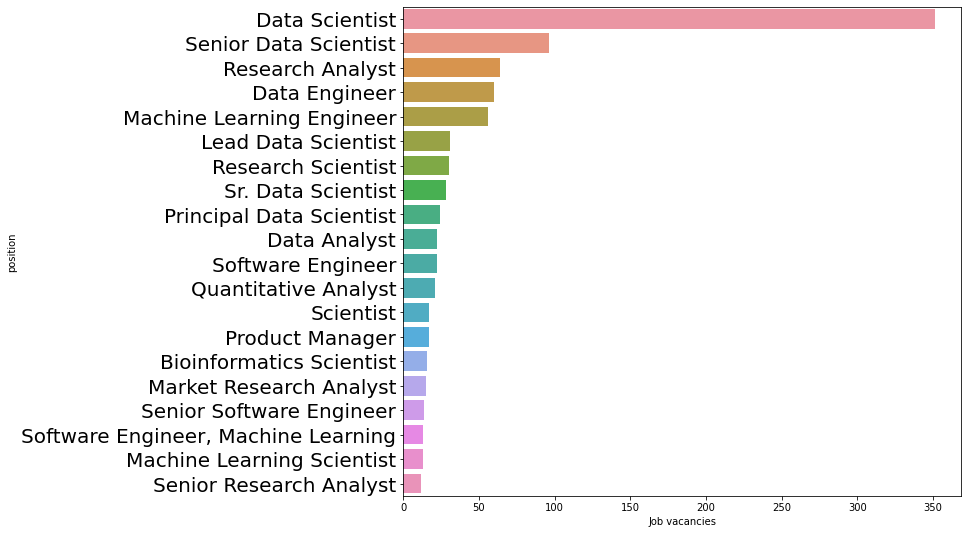

In [0]:
df2=df.groupby(by="position").size().reset_index(name="Job vacancies").sort_values(by="Job vacancies",ascending=False)
plt.figure(figsize=(10,9))
sb.barplot(y="position",x="Job vacancies",data=df2.head(20))
plt.yticks(size=20)


count                   Position
Data Scientist               351             Data Scientist
Senior Data Scientist         96      Senior Data Scientist
Research Analyst              64           Research Analyst
Data Engineer                 60              Data Engineer
Machine Learning Engineer     56  Machine Learning Engineer
Lead Data Scientist           31        Lead Data Scientist
Research Scientist            30         Research Scientist
Sr. Data Scientist            28         Sr. Data Scientist
Principal Data Scientist      24   Principal Data Scientist
Data Analyst                  22               Data Analyst
Software Engineer             22          Software Engineer
Quantitative Analyst          21       Quantitative Analyst
Product Manager               17            Product Manager
Scientist                     17                  Scientist
Bioinformatics Scientist      16   Bioinformatics Scientist

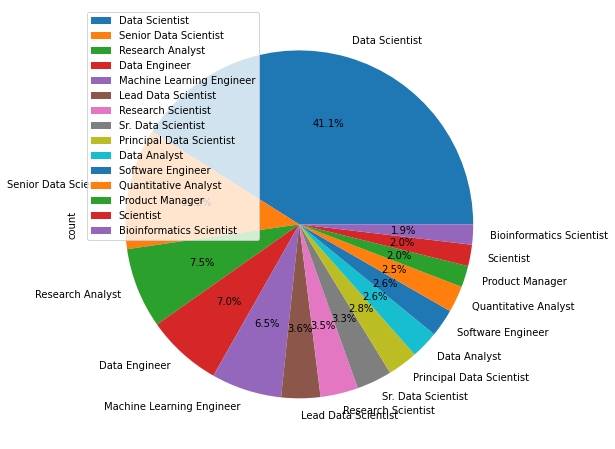

In [44]:

top.plot.pie(y="count",figsize=(35,8),subplots=True,autopct='%1.1f%%')
top


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

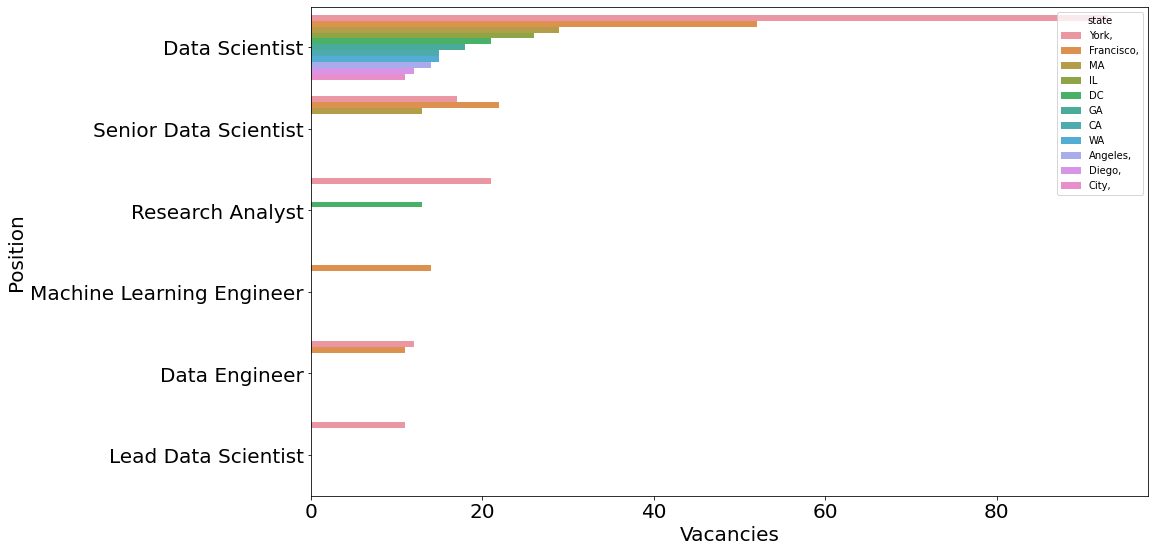

In [65]:
df3=df.groupby(by=["position","state"]).size().reset_index(name="vacancy").sort_values(by="vacancy",ascending=False)
plt.figure(figsize=(15,9))
sb.barplot(x="vacancy",y="position",data=df3.head(20),hue="state")
plt.yticks(size=20)
plt.ylabel("Position",size=20)
plt.xlabel("Vacancies",size=20)
plt.xticks(size=20)

In [67]:
df3.head()

position       state  vacancy
1185         Data Scientist       York,       93
1171         Data Scientist  Francisco,       52
1176         Data Scientist          MA       29
1174         Data Scientist          IL       26
4368  Senior Data Scientist  Francisco,       22

In [59]:
plt.figure(figsize=(15,9))
sb.barplot(x="vacancy",y="position",data=df3.head(20),hue="state")
plt.yticks(size=15)
plt.ylabel("Position",size=15)
plt.xlabel("Vacancies",size=16)
plt.xticks(size=15)

NameError: ignored

<Figure size 1080x648 with 0 Axes>

###Data Scientist Jobs

In [68]:
Data_scientists=df[(df["position"]=='Data Scientist')|(df["position"]=='Senior Data Scientist')|
   (df["position"]=='Lead Data Scientist')
|(df["position"]=='Sr. Data Scientist')]
Data_scientists.head()
skills=Data_scientists.description.tolist()
Data_scientists.head()



position                company  ...     city  state
2   Data Scientist         Xpert Staffing  ...  Atlanta     GA
15  Data Scientist               Cotiviti  ...  Atlanta     GA
18  Data Scientist            Relus Cloud  ...  Atlanta     GA
19  Data Scientist         Inspire Brands  ...  Atlanta     GA
22  Data Scientist  Norfolk Southern Corp  ...  Atlanta     GA

[5 rows x 7 columns]

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 10 Text major ticklabel objects>)

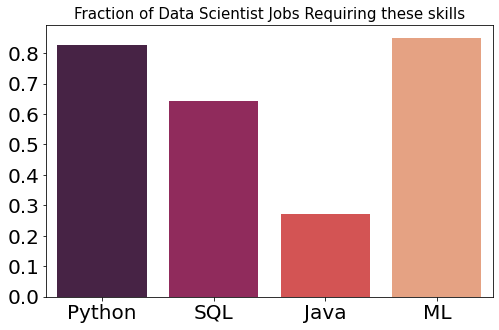

In [104]:
sql=Data_scientists[Data_scientists.description.str.contains("SQL|sql")].shape[0]/Data_scientists.shape[0]
python=Data_scientists[Data_scientists.description.str.contains("python|Python|PYTHON")].shape[0]/Data_scientists.shape[0]
java=Data_scientists[Data_scientists.description.str.contains("java|Java|JAVA")].shape[0]/Data_scientists.shape[0]
ml=Data_scientists[Data_scientists.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/Data_scientists.shape[0]
k=[python,sql,java,ml]
plt.figure(figsize=(8,5))
sb.barplot(y=k,x=["Python","SQL","Java","ML"],palette="rocket")

plt.title("Fraction of Data Scientist Jobs Requiring these skills",size=15)
plt.xticks(size=20)
plt.yticks(size=20)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text major ticklabel objects>)

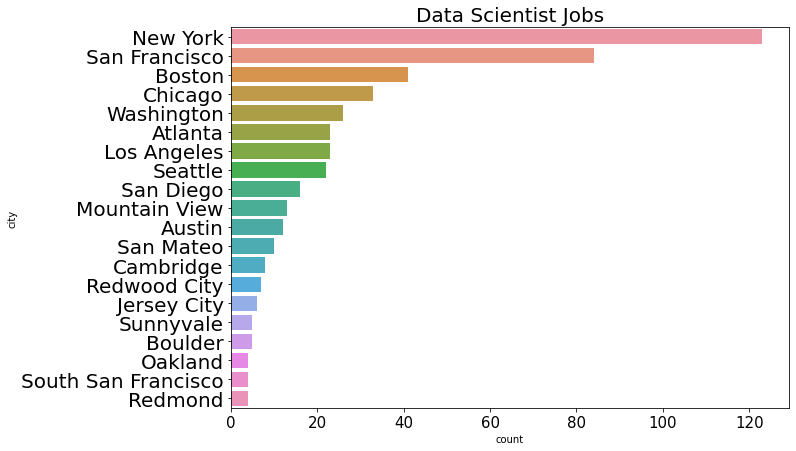

In [88]:
df5=Data_scientists.groupby(by="city").size().reset_index(name="count").sort_values(by="count",ascending=False)
df5.head(10)
plt.figure(figsize=(10,7))
plt.yticks(size=20)
sb.barplot(y="city",x="count",data=df5.head(20))
plt.title("Data Scientist Jobs",size=20)
plt.xticks(size=15)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

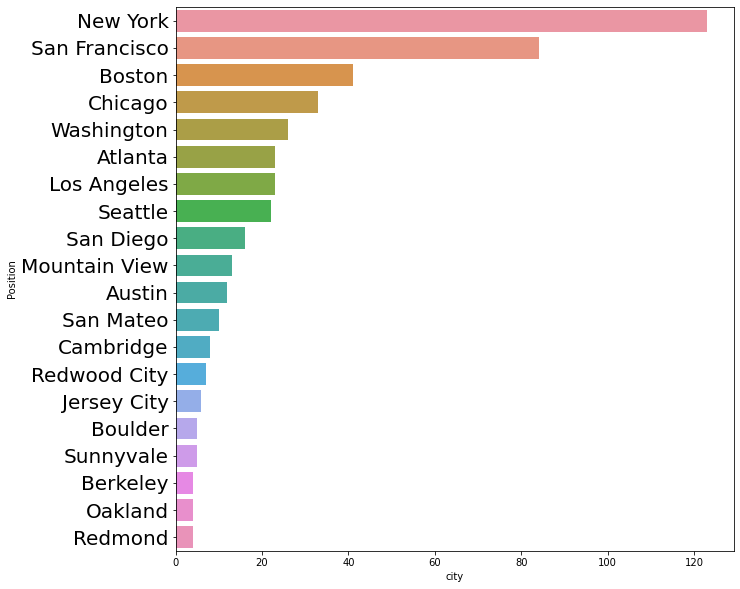

In [71]:
sc=pd.DataFrame(Data_scientists.city.value_counts()[:20])

sc["Position"]=sc.index
sc=sc.rename(columns={'position':'count'})



plt.figure(figsize=(10,10))
sb.barplot(y="Position",x="city",data=sc)
plt.yticks(size=20
           )

In [96]:
def split_text(texts):
    wordslist=[]
    for word in texts:
        wordslist.append(word.split())
    new_list=[]
    for listt in wordslist:
        new_list=new_list+listt
    text=" ".join(new_list)
    return text 
split_text(skills)    


'Growing company located in the Atlanta, GA area is currently looking to add a Data Scientist to their team. The Data Scientist will analyze business level data to produce actionable insights utilizing analytics tools and languages, etc. R, Python and/or C++: The Data Scientist will serve as the organization’s leader, helping to grow their data science initiative from a green state. The Data Scientist will also be responsible for advancement of analytical projects from inception to delivery and beyond. RESPONSIBLITIES; 1. Leverage Big Data to discover patterns and solve strategic and tactical business problems using massive structured and unstructured data sets across multiple environments 2. Develop analytical capabilities (modeling and processes) that drive better outcomes for both customers and the company 3. Drive the collection, cleansing, processing and analysis of new and existing data sources. 4. Research industry topics impacting opportunities relevant for data analysis projec

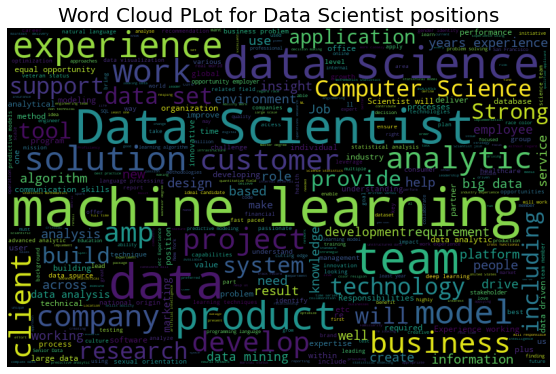

In [103]:
def split_text(texts):
    wordslist=[]
    for word in texts:
        wordslist.append(word.split())
    new_list=[]
    for listt in wordslist:
        new_list=new_list+listt
    text=" ".join(new_list)
    return text 

skills=Data_scientists.description.tolist()
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='black', max_words=500, 
                min_font_size = 5).generate(split_text(skills))

plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.title('Word Cloud PLot for Data Scientist positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

#### Machine Learning Engineer

In [117]:
ML_engineer=df[(df["position"]=='Machine Learning Engineer')]
ML_engineer.head()


position          company  ...    city  state
328  Machine Learning Engineer  Keller Williams  ...  Austin     TX
809  Machine Learning Engineer      Pluralsight  ...  Boston     MA
814  Machine Learning Engineer          Klaviyo  ...  Boston     MA
822  Machine Learning Engineer           Soroco  ...  Boston     MA
827  Machine Learning Engineer          Spotify  ...  Boston     MA

[5 rows x 7 columns]

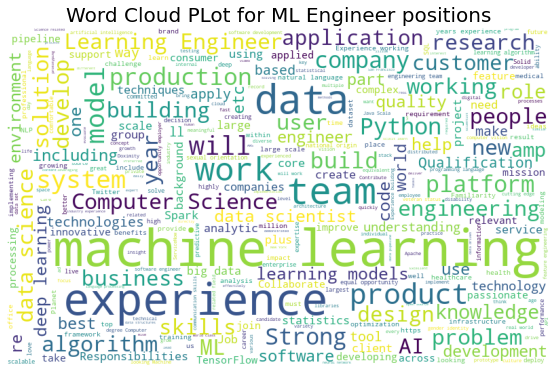

In [122]:
skills_ml_engineer=ML_engineer.description.tolist()
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white',max_words=300,
                min_font_size = 5).generate(split_text(skills_ml_engineer))

plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.title('Word Cloud PLot for ML Engineer positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

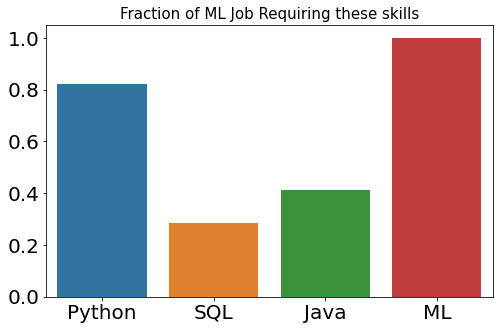

In [124]:
sql=ML_engineer[ML_engineer.description.str.contains("SQL|sql")].shape[0]/ML_engineer.shape[0]
python=ML_engineer[ML_engineer.description.str.contains("python|Python|PYTHON")].shape[0]/ML_engineer.shape[0]
java=ML_engineer[ML_engineer.description.str.contains("java|Java|JAVA")].shape[0]/ML_engineer.shape[0]
ml=ML_engineer[ML_engineer.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/ML_engineer.shape[0]

k=[python,sql,java,ml]
plt.figure(figsize=(8,5))
sb.barplot(y=k,x=["Python","SQL","Java","ML"],)

plt.title("Fraction of ML Job Requiring these skills",size=15)
plt.xticks(size=20)
plt.yticks(size=20)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text major ticklabel objects>)

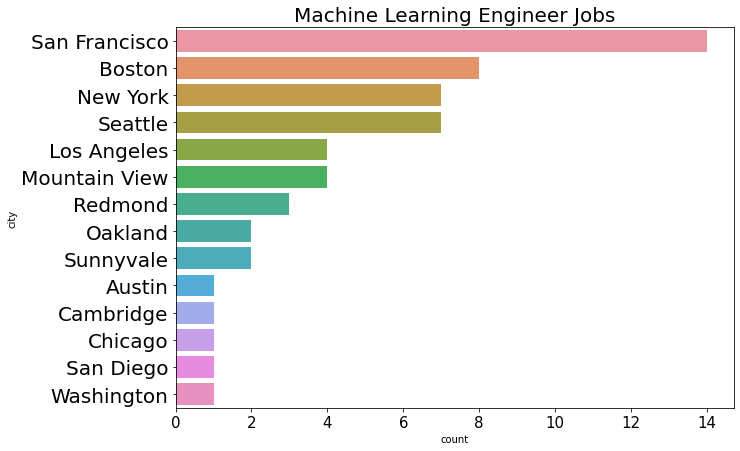

In [119]:
df6=ML_engineer.groupby(by="city").size().reset_index(name="count").sort_values(by="count",ascending=False)
df6.head(10)
plt.figure(figsize=(10,7))
plt.yticks(size=20)
sb.barplot(y="city",x="count",data=df6.head(20))
plt.title("Machine Learning Engineer Jobs",size=20)
plt.xticks(size=15)


####Data Engineer

In [125]:
Data_engineer=df[(df["position"]=='Data Engineer')]
Data_engineer.head()

position                   company  ...     city  state
61   Data Engineer                    Gallup  ...  Atlanta     GA
755  Data Engineer  Partners HealthCare(PHS)  ...   Boston     MA
793  Data Engineer              Cervello Inc  ...   Boston     MA
798  Data Engineer    Vertex Pharmaceuticals  ...   Boston     MA
799  Data Engineer                    Vertex  ...   Boston     MA

[5 rows x 7 columns]

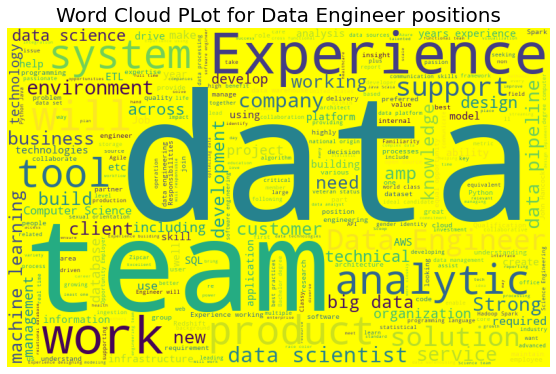

In [130]:
skills_data_engineer=Data_engineer.description.tolist()
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='yellow',contour_color='steelblue', max_words=500, 
                min_font_size = 5).generate(split_text(skills_data_engineer))

plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.title('Word Cloud PLot for Data Engineer positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text major ticklabel objects>)

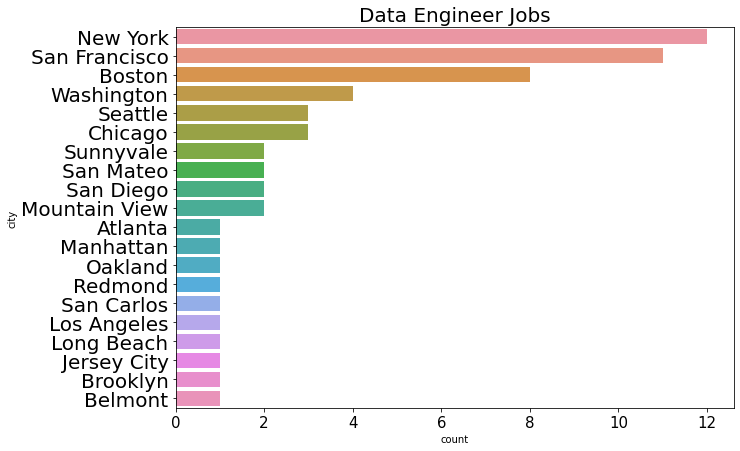

In [127]:
df7=Data_engineer.groupby(by="city").size().reset_index(name="count").sort_values(by="count",ascending=False)
df7.head(10)
plt.figure(figsize=(10,7))
plt.yticks(size=20)
sb.barplot(y="city",x="count",data=df7.head(20))
plt.title("Data Engineer Jobs",size=20)
plt.xticks(size=15)


'As a not-for-profit organization, Partners HealthCare is committed to supporting patient care, research, teaching, and service to the community by leading innovation across our system. Founded by Brigham and Women’s Hospital and Massachusetts General Hospital, Partners HealthCare supports a complete continuum of care including community and specialty hospitals, a managed care organization, a physician network, community health centers, home care and other health-related entities. Several of our hospitals are teaching affiliates of Harvard Medical School, and our system is a national leader in biomedical research.\n\n\nWe’re focused on a people-first culture for our system’s patients and our professional family. That’s why we provide our employees with more ways to achieve their potential. Partners HealthCare is committed to aligning our employees’ personal aspirations with projects that match their capabilities and creating a culture that empowers our managers to become trusted mentor

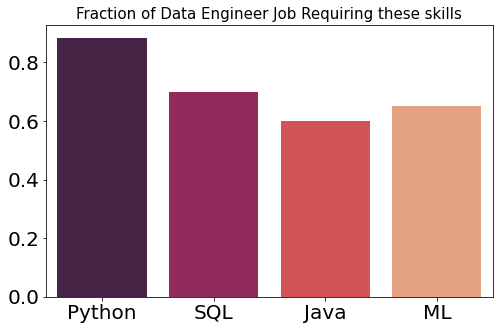

In [132]:
sql=Data_engineer[Data_engineer.description.str.contains("SQL|sql")].shape[0]/Data_engineer.shape[0]
python=Data_engineer[Data_engineer.description.str.contains("python|Python|PYTHON")].shape[0]/Data_engineer.shape[0]
java=Data_engineer[Data_engineer.description.str.contains("java|Java|JAVA")].shape[0]/Data_engineer.shape[0]
ml=Data_engineer[Data_engineer.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/Data_engineer.shape[0]

k=[python,sql,java,ml]
plt.figure(figsize=(8,5))
sb.barplot(y=k,x=["Python","SQL","Java","ML",],palette="rocket")

plt.title("Fraction of Data Engineer Job Requiring these skills",size=15)
plt.xticks(size=20)
plt.yticks(size=20)



#### Data Analyst

In [0]:
analyst=df[df.position.str.contains("analyst|Analyst")]

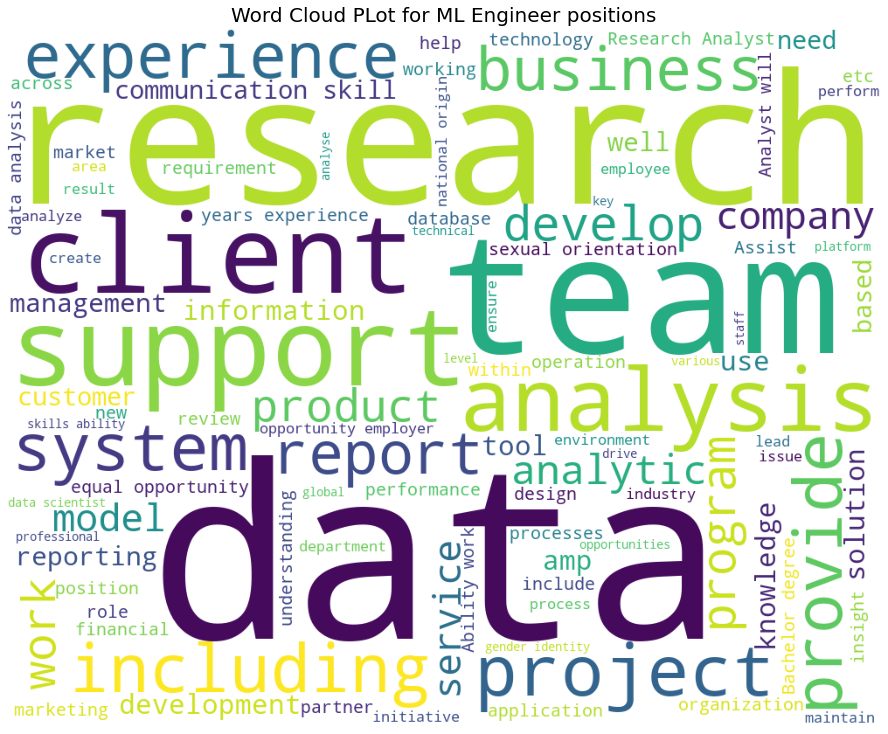

In [145]:
skill_analyst=analyst.description.tolist()
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white',max_words=100,  
                min_font_size = 5).generate(split_text(skill_analyst))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Word Cloud PLot for ML Engineer positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [150]:
data_analyst=df[(df["position"]=='Data Analyst')]
data_analyst.head()


position               company  ...         city     state
3     Data Analyst        Operation HOPE  ...      Atlanta        GA
298   Data Analyst  Applied Systems Inc.  ...       Austin        TX
1363  Data Analyst            TrueMotion  ...       Boston        MA
2247  Data Analyst      Uptown Treehouse  ...  Los Angeles  Angeles,
2498  Data Analyst            Amazon.com  ...    Cambridge        MA

[5 rows x 7 columns]

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text major ticklabel objects>)

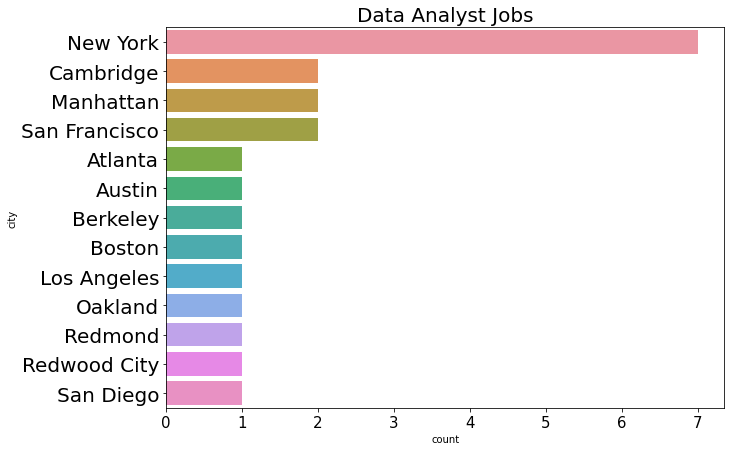

In [152]:
df8=data_analyst.groupby(by="city").size().reset_index(name="count").sort_values(by="count",ascending=False)
df8.head(10)
plt.figure(figsize=(10,7))
plt.yticks(size=20)
sb.barplot(y="city",x="count",data=df8.head(20))
plt.title("Data Analyst Jobs",size=20)
plt.xticks(size=15)


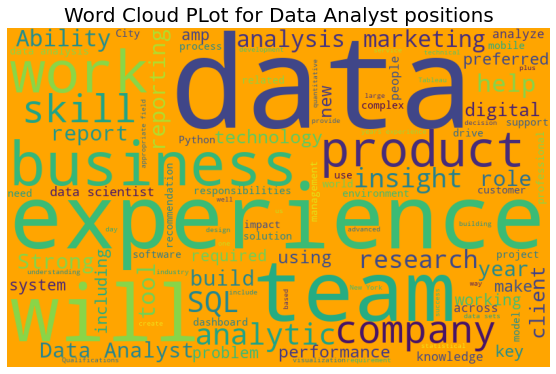

In [154]:
skill_data_analyst=data_analyst.description.tolist()
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='orange',max_words=100,  
                min_font_size = 5).generate(split_text(skill_data_analyst))

plt.figure(figsize=(20,5))
plt.imshow(wordcloud)
plt.title('Word Cloud PLot for Data Analyst positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

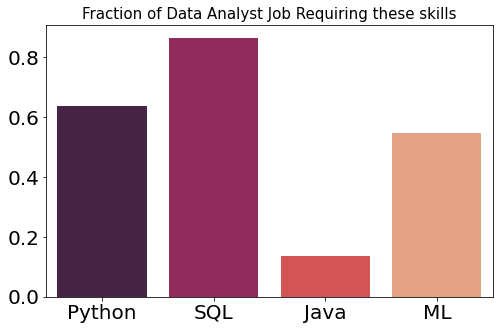

In [155]:
sql=data_analyst[data_analyst.description.str.contains("SQL|sql")].shape[0]/data_analyst.shape[0]
python=data_analyst[data_analyst.description.str.contains("python|Python|PYTHON")].shape[0]/data_analyst.shape[0]
java=data_analyst[data_analyst.description.str.contains("java|Java|JAVA")].shape[0]/data_analyst.shape[0]
ml=data_analyst[data_analyst.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/data_analyst.shape[0]

k=[python,sql,java,ml]
plt.figure(figsize=(8,5))

sb.barplot(y=k,x=["Python","SQL","Java","ML"],palette='rocket',color="red",capsize=1)

plt.title("Fraction of Data Analyst Job Requiring these skills",size=15)
plt.xticks(size=20)
plt.yticks(size=20)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 <a list of 9 Text major ticklabel objects>)

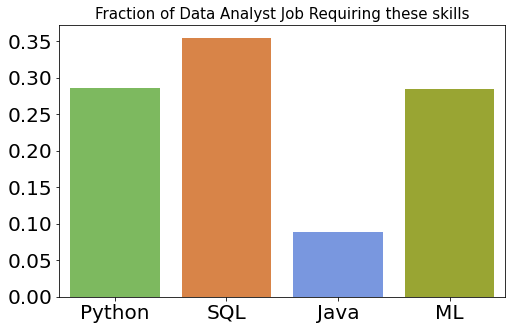

In [148]:
sql=analyst[analyst.description.str.contains("SQL|sql")].shape[0]/analyst.shape[0]
python=analyst[analyst.description.str.contains("python|Python|PYTHON")].shape[0]/analyst.shape[0]
java=analyst[analyst.description.str.contains("java|Java|JAVA")].shape[0]/analyst.shape[0]
ml=analyst[analyst.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/analyst.shape[0]

k=[python,sql,java,ml]
plt.figure(figsize=(8,5))

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sb.barplot(y=k,x=["Python","SQL","Java","ML"],palette=pkmn_type_colors,color="red",capsize=1)

plt.title("Fraction of Data Analyst Job Requiring these skills",size=15)
plt.xticks(size=20)
plt.yticks(size=20)



### Software Engineer

In [0]:
software_engineer=df[(df["position"]=='Software Engineer')]
skills_software=software_engineer.description.tolist()

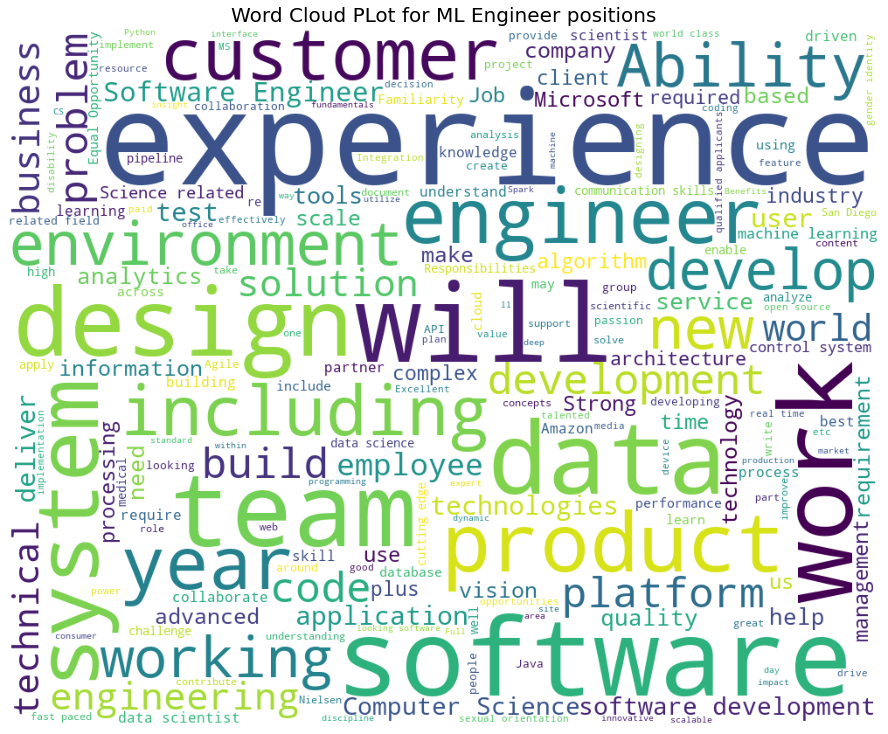

In [0]:
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white',  
                min_font_size = 5).generate(split_tweets(skills_software))

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title('Word Cloud PLot for ML Engineer positions',size=20)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [0]:
sql=software_engineer[software_engineer.description.str.contains("SQL|sql")].shape[0]/software_engineer.shape[0]
python=software_engineer[software_engineer.description.str.contains("python|Python|PYTHON")].shape[0]/software_engineer.shape[0]
java=software_engineer[software_engineer.description.str.contains("java|Java|JAVA")].shape[0]/software_engineer.shape[0]
ml=software_engineer[software_engineer.description.str.contains("machine|learning|ml|ML|machine Learning|Machine Learning|Machine learning")].shape[0]/software_engineer.shape[0]
sql,python,java,ml

(0.36363636363636365,
 0.5454545454545454,
 0.5454545454545454,
 0.6818181818181818)